In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [3]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'SpecialMM', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SpecialMM
2,Target type,Binary
3,Original data shape,"(1070, 19)"
4,Transformed data shape,"(1070, 19)"
5,Transformed train set shape,"(749, 19)"
6,Transformed test set shape,"(321, 19)"
7,Numeric features,16
8,Categorical features,2
9,Preprocess,True


In [4]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [5]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [6]:
# init setup on exp
exp.setup(data, target = 'SpecialMM', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SpecialMM
2,Target type,Binary
3,Original data shape,"(1070, 19)"
4,Transformed data shape,"(1070, 19)"
5,Transformed train set shape,"(749, 19)"
6,Transformed test set shape,"(321, 19)"
7,Numeric features,16
8,Categorical features,2
9,Preprocess,True


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

In [7]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9826,0.9972,0.9506,0.9484,0.9468,0.9365,0.9384,0.2780
gbc,Gradient Boosting Classifier,0.9813,0.9938,0.9090,0.9749,0.9390,0.9280,0.9300,0.0170
xgboost,Extreme Gradient Boosting,0.9773,0.9958,0.9090,0.9518,0.9281,0.9146,0.9162,0.0120
catboost,CatBoost Classifier,0.9719,0.9962,0.8590,0.9666,0.9063,0.8900,0.8942,0.1880
rf,Random Forest Classifier,0.9666,0.9949,0.8423,0.9523,0.8890,0.8696,0.8750,0.0230
dt,Decision Tree Classifier,0.9613,0.9202,0.8596,0.9024,0.8782,0.8552,0.8572,0.0060
et,Extra Trees Classifier,0.9599,0.9931,0.8340,0.9147,0.8680,0.8446,0.8487,0.0180
ada,Ada Boost Classifier,0.9506,0.9786,0.7763,0.9161,0.8328,0.8043,0.8130,0.0190
lr,Logistic Regression,0.8838,0.8227,0.3551,0.8409,0.4878,0.4363,0.4927,0.9270
ridge,Ridge Classifier,0.8705,0.8237,0.2391,0.8714,0.3570,0.3146,0.3992,0.0070


In [8]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9826,0.9972,0.9506,0.9484,0.9468,0.9365,0.9384,0.2670
gbc,Gradient Boosting Classifier,0.9813,0.9938,0.9090,0.9749,0.9390,0.9280,0.9300,0.0180
xgboost,Extreme Gradient Boosting,0.9773,0.9958,0.9090,0.9518,0.9281,0.9146,0.9162,0.0090
catboost,CatBoost Classifier,0.9719,0.9962,0.8590,0.9666,0.9063,0.8900,0.8942,0.1170
rf,Random Forest Classifier,0.9666,0.9949,0.8423,0.9523,0.8890,0.8696,0.8750,0.0210
dt,Decision Tree Classifier,0.9613,0.9202,0.8596,0.9024,0.8782,0.8552,0.8572,0.0060
et,Extra Trees Classifier,0.9599,0.9931,0.8340,0.9147,0.8680,0.8446,0.8487,0.0190
ada,Ada Boost Classifier,0.9506,0.9786,0.7763,0.9161,0.8328,0.8043,0.8130,0.0130
lr,Logistic Regression,0.8838,0.8227,0.3551,0.8409,0.4878,0.4363,0.4927,0.0140
ridge,Ridge Classifier,0.8705,0.8237,0.2391,0.8714,0.3570,0.3146,0.3992,0.0070


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

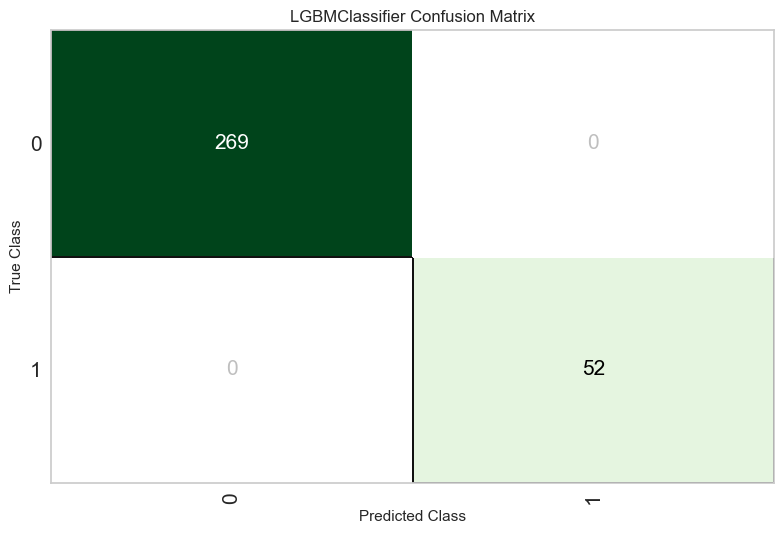

In [9]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

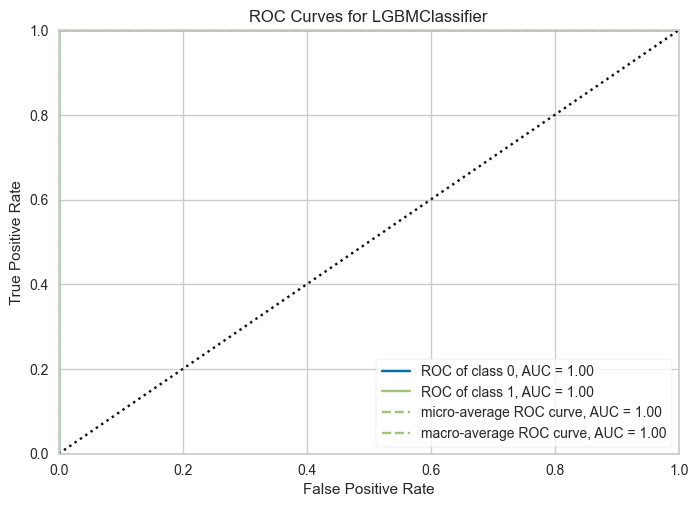

In [10]:
# plot AUC
plot_model(best, plot = 'auc')

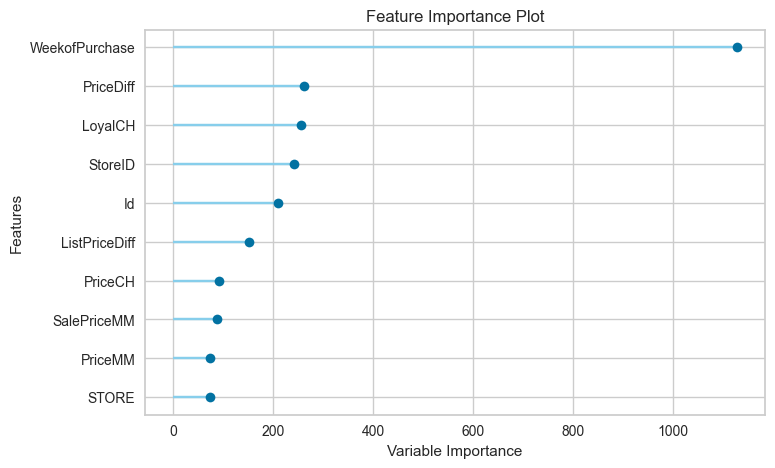

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

In [12]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [1]:
evaluate_model(best)

NameError: name 'evaluate_model' is not defined

___

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [15]:
# show predictions df
holdout_pred.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,LoyalCH,...,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,SpecialMM,prediction_label,prediction_score
782,783,CH,250,1,1.86,2.09,0.0,0.0,0,0.735240,...,1.86,0.23,No,0.000000,0.0,0.23,1,0,0,0.9999
965,966,CH,233,1,1.69,1.99,0.0,0.0,0,0.435200,...,1.69,0.30,No,0.000000,0.0,0.30,1,0,0,1.0000
276,277,MM,240,3,1.79,2.23,0.0,0.0,0,0.014074,...,1.79,0.44,No,0.000000,0.0,0.44,3,0,0,1.0000
938,939,MM,237,2,1.75,1.99,0.0,0.0,0,0.086789,...,1.75,0.24,No,0.000000,0.0,0.24,2,0,0,0.9995
339,340,CH,233,7,1.75,1.99,0.0,0.4,1,0.744000,...,1.75,-0.16,Yes,0.201005,0.0,0.24,0,0,0,0.9992


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [16]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('SpecialMM', axis=1, inplace=True)
new_data.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,prediction_label,prediction_score
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,0,0.9999
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,1,0.9995
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,0,1.0000
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,0,0.9965
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,0,0.9591


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Id', 'WeekofPurchase', 'StoreID',
                                              'PriceCH', 'PriceMM', 'DiscCH',
                                              'DiscMM', 'SpecialCH', 'LoyalCH',
                                              'SalePriceMM', 'SalePriceCH',
                                              'PriceDiff', 'PctDiscMM',
                                              'PctDiscCH', 'ListPriceDiff',
                                              'STORE'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_v...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_byt

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/rx/lm_kfng95w9_1rxj88cthphm0000gq/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Id', 'WeekofPurchase', 'StoreID',
                                             'PriceCH', 'PriceMM', 'DiscCH',
                                             'DiscMM', 'SpecialCH', 'LoyalCH',
                                             'SalePriceMM', 'SalePriceCH',
                                             'PriceDiff', 'PctDiscMM',
                                             'PctDiscCH', 'ListPriceDiff',
                                             'STORE'],
                                    transfo...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [20]:
# init setup function
s = setup(data, target = 'SpecialMM', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SpecialMM
2,Target type,Binary
3,Original data shape,"(1070, 19)"
4,Transformed data shape,"(1070, 19)"
5,Transformed train set shape,"(749, 19)"
6,Transformed test set shape,"(321, 19)"
7,Numeric features,16
8,Categorical features,2
9,Preprocess,True


To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [21]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
232,233.0,0.0,233.0,7.0,1.75,1.99,0.00,0.40,1.0,0.628114,1.59,1.75,-0.16,1.0,0.201005,0.000000,0.24,0.0
346,347.0,0.0,264.0,7.0,1.86,2.13,0.37,0.00,1.0,0.946313,2.13,1.49,0.64,1.0,0.000000,0.198925,0.27,0.0
344,345.0,0.0,261.0,7.0,1.86,2.13,0.00,0.24,0.0,0.916114,1.89,1.86,0.03,1.0,0.112676,0.000000,0.27,0.0
213,214.0,0.0,263.0,7.0,1.86,2.13,0.27,0.00,0.0,0.960830,2.13,1.59,0.54,1.0,0.000000,0.145161,0.27,0.0
367,368.0,1.0,258.0,2.0,1.86,2.18,0.00,0.00,0.0,0.256000,2.18,1.86,0.32,0.0,0.000000,0.000000,0.32,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,52.0,0.0,249.0,4.0,1.99,2.23,0.00,0.00,0.0,0.742140,2.23,1.99,0.24,0.0,0.000000,0.000000,0.24,4.0
252,253.0,0.0,271.0,7.0,1.86,2.13,0.00,0.00,0.0,0.992110,2.13,1.86,0.27,1.0,0.000000,0.000000,0.27,0.0
181,182.0,0.0,250.0,7.0,1.86,2.09,0.00,0.00,0.0,0.996311,2.09,1.86,0.23,1.0,0.000000,0.000000,0.23,0.0
942,943.0,1.0,255.0,2.0,1.89,2.18,0.13,0.00,0.0,0.035549,2.18,1.76,0.42,0.0,0.000000,0.068783,0.29,2.0


In [23]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [24]:
# help(setup)

In [25]:
# init setup with normalize = True

s = setup(data, target = 'SpecialMM', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,SpecialMM
2,Target type,Binary
3,Original data shape,"(1070, 19)"
4,Transformed data shape,"(1070, 19)"
5,Transformed train set shape,"(749, 19)"
6,Transformed test set shape,"(321, 19)"
7,Numeric features,16
8,Categorical features,2
9,Preprocess,True


<Axes: >

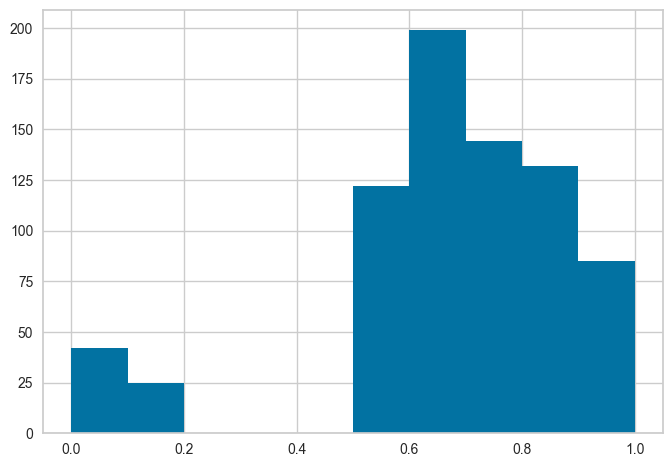

In [26]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['PriceMM'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

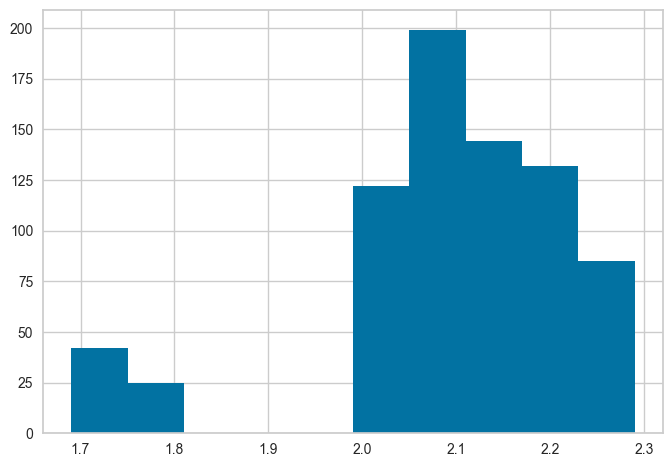

In [27]:
get_config('X_train')['PriceMM'].hist()

___

## ✅ Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [28]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9826,0.9938,0.9090,0.9832,0.9430,0.9328,0.9349,0.0190
lightgbm,Light Gradient Boosting Machine,0.9826,0.9972,0.9506,0.9484,0.9468,0.9365,0.9384,0.2760
xgboost,Extreme Gradient Boosting,0.9773,0.9958,0.9090,0.9518,0.9281,0.9146,0.9162,0.0080
catboost,CatBoost Classifier,0.9719,0.9962,0.8590,0.9666,0.9063,0.8900,0.8942,0.1110
rf,Random Forest Classifier,0.9666,0.9950,0.8423,0.9523,0.8890,0.8696,0.8750,0.0210
dt,Decision Tree Classifier,0.9613,0.9202,0.8596,0.9024,0.8782,0.8552,0.8572,0.0070
et,Extra Trees Classifier,0.9599,0.9931,0.8340,0.9147,0.8680,0.8446,0.8487,0.0180
ada,Ada Boost Classifier,0.9506,0.9791,0.7763,0.9161,0.8328,0.8043,0.8130,0.0120
knn,K Neighbors Classifier,0.9359,0.9369,0.6929,0.8882,0.7741,0.7378,0.7481,0.0080
lr,Logistic Regression,0.8772,0.8289,0.3141,0.8194,0.4429,0.3911,0.4529,0.0080


`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [29]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [30]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9826,0.9938,0.9090,0.9832,0.9430,0.9328,0.9349,0.0170
lightgbm,Light Gradient Boosting Machine,0.9826,0.9972,0.9506,0.9484,0.9468,0.9365,0.9384,0.2710
xgboost,Extreme Gradient Boosting,0.9773,0.9958,0.9090,0.9518,0.9281,0.9146,0.9162,0.0080
catboost,CatBoost Classifier,0.9719,0.9962,0.8590,0.9666,0.9063,0.8900,0.8942,0.0980
rf,Random Forest Classifier,0.9666,0.9950,0.8423,0.9523,0.8890,0.8696,0.8750,0.0250
dt,Decision Tree Classifier,0.9613,0.9202,0.8596,0.9024,0.8782,0.8552,0.8572,0.0070
et,Extra Trees Classifier,0.9599,0.9931,0.8340,0.9147,0.8680,0.8446,0.8487,0.0190


In [31]:
compare_tree_models

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [32]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9826,0.9938,0.9090,0.9832,0.9430,0.9328,0.9349,0.017
lightgbm,Light Gradient Boosting Machine,0.9826,0.9972,0.9506,0.9484,0.9468,0.9365,0.9384,0.271
xgboost,Extreme Gradient Boosting,0.9773,0.9958,0.9090,0.9518,0.9281,0.9146,0.9162,0.008
catboost,CatBoost Classifier,0.9719,0.9962,0.8590,0.9666,0.9063,0.8900,0.8942,0.098
rf,Random Forest Classifier,0.9666,0.9950,0.8423,0.9523,0.8890,0.8696,0.8750,0.025
dt,Decision Tree Classifier,0.9613,0.9202,0.8596,0.9024,0.8782,0.8552,0.8572,0.007
et,Extra Trees Classifier,0.9599,0.9931,0.8340,0.9147,0.8680,0.8446,0.8487,0.019


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [33]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5447,0.9247,0.9673,0.2611,0.4102,0.2083,0.3263,0.0060
lightgbm,Light Gradient Boosting Machine,0.9826,0.9972,0.9506,0.9484,0.9468,0.9365,0.9384,0.2750
gbc,Gradient Boosting Classifier,0.9826,0.9938,0.9090,0.9832,0.9430,0.9328,0.9349,0.0180
xgboost,Extreme Gradient Boosting,0.9773,0.9958,0.9090,0.9518,0.9281,0.9146,0.9162,0.0160
dt,Decision Tree Classifier,0.9613,0.9202,0.8596,0.9024,0.8782,0.8552,0.8572,0.0070
catboost,CatBoost Classifier,0.9719,0.9962,0.8590,0.9666,0.9063,0.8900,0.8942,0.1070
rf,Random Forest Classifier,0.9666,0.9950,0.8423,0.9523,0.8890,0.8696,0.8750,0.0270
et,Extra Trees Classifier,0.9599,0.9931,0.8340,0.9147,0.8680,0.8446,0.8487,0.0250
ada,Ada Boost Classifier,0.9506,0.9791,0.7763,0.9161,0.8328,0.8043,0.8130,0.0110
knn,K Neighbors Classifier,0.9359,0.9369,0.6929,0.8882,0.7741,0.7378,0.7481,0.0060


In [34]:
# list of top 3 models by Recall
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=1

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [35]:
# help(compare_models)

## ✅ Set Custom Metrics

In [36]:
# check available metrics used in CV
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x31f704310>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x31f704670>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x31f7048b0>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [37]:
# create a custom function
import numpy as np

def custom_metric(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (100), 0)
    fp = np.where((y_pred==1) & (y==0), -5, 0)
    return np.sum([tp,fp])

# add metric to PyCaret
add_metric('custom_metric', 'Custom Metric', custom_metric)

Name                                                     Custom Metric
Display Name                                             Custom Metric
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(custom_metric, response_method='pr...
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: custom_metric, dtype: object

In [38]:
# now let's run compare_models again
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric,TT (Sec)
gbc,Gradient Boosting Classifier,0.9826,0.9938,0.9090,0.9832,0.9430,0.9328,0.9349,0.0000,0.0200
lightgbm,Light Gradient Boosting Machine,0.9826,0.9972,0.9506,0.9484,0.9468,0.9365,0.9384,0.0000,0.2720
xgboost,Extreme Gradient Boosting,0.9773,0.9958,0.9090,0.9518,0.9281,0.9146,0.9162,0.0000,0.0160
catboost,CatBoost Classifier,0.9719,0.9962,0.8590,0.9666,0.9063,0.8900,0.8942,0.0000,0.1020
rf,Random Forest Classifier,0.9666,0.9950,0.8423,0.9523,0.8890,0.8696,0.8750,0.0000,0.0280
dt,Decision Tree Classifier,0.9613,0.9202,0.8596,0.9024,0.8782,0.8552,0.8572,0.0000,0.0070
et,Extra Trees Classifier,0.9599,0.9931,0.8340,0.9147,0.8680,0.8446,0.8487,0.0000,0.0250
ada,Ada Boost Classifier,0.9506,0.9791,0.7763,0.9161,0.8328,0.8043,0.8130,0.0000,0.0130
knn,K Neighbors Classifier,0.9359,0.9369,0.6929,0.8882,0.7741,0.7378,0.7481,0.0000,0.0080
lr,Logistic Regression,0.8772,0.8289,0.3141,0.8194,0.4429,0.3911,0.4529,0.0000,0.0080


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [39]:
# remove custom metric
remove_metric('custom_metric')

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [40]:
# from pycaret.classification import *
# s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='diabetes_experiment')

In [41]:
# compare models
# best = compare_models()

In [42]:
# start mlflow server on localhost:5000
# !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [43]:
# help(setup)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [44]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [45]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.8757,0.4167,0.8333,0.5556,0.5025,0.5416
1,0.8667,0.8638,0.3333,0.6667,0.4444,0.3781,0.4075
2,0.9067,0.9114,0.5833,0.7778,0.6667,0.6137,0.6223
3,0.8933,0.8254,0.3333,1.0000,0.5000,0.4565,0.5439
4,0.8400,0.7593,0.1667,0.5000,0.2500,0.1848,0.2201
5,0.8933,0.7910,0.3333,1.0000,0.5000,0.4565,0.5439
6,0.8533,0.7275,0.1667,0.6667,0.2667,0.2165,0.2821
7,0.8800,0.8360,0.2500,1.0000,0.4000,0.3590,0.4677
8,0.8800,0.8660,0.3077,1.0000,0.4706,0.4236,0.5184


The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [46]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.8757,0.4167,0.8333,0.5556,0.5025,0.5416
1,0.8667,0.8638,0.3333,0.6667,0.4444,0.3781,0.4075
2,0.9067,0.9114,0.5833,0.7778,0.6667,0.6137,0.6223
3,0.8933,0.8254,0.3333,1.0000,0.5000,0.4565,0.5439
4,0.8400,0.7593,0.1667,0.5000,0.2500,0.1848,0.2201
5,0.8933,0.7910,0.3333,1.0000,0.5000,0.4565,0.5439
6,0.8533,0.7275,0.1667,0.6667,0.2667,0.2165,0.2821
7,0.8800,0.8360,0.2500,1.0000,0.4000,0.3590,0.4677
8,0.8800,0.8660,0.3077,1.0000,0.4706,0.4236,0.5184


In [47]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8920,0.8713,0.4250,0.8095,0.5574,0.5026,0.5365
1,0.8560,0.7975,0.2927,0.6316,0.4000,0.3305,0.3622
2,0.8635,0.8323,0.1750,0.8750,0.2917,0.2516,0.3544
Mean,0.8705,0.8337,0.2976,0.7720,0.4163,0.3615,0.4177
Std,0.0155,0.0301,0.1021,0.1029,0.1091,0.1048,0.0841


In [48]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.8810,0.4167,0.8333,0.5556,0.5025,0.5416
1,0.8667,0.8624,0.2500,0.7500,0.3750,0.3207,0.3820
2,0.8933,0.8955,0.5000,0.7500,0.6000,0.5413,0.5561
3,0.8800,0.8280,0.2500,1.0000,0.4000,0.3590,0.4677
4,0.8400,0.7513,0.1667,0.5000,0.2500,0.1848,0.2201
5,0.8933,0.7817,0.3333,1.0000,0.5000,0.4565,0.5439
6,0.8533,0.7381,0.1667,0.6667,0.2667,0.2165,0.2821
7,0.8533,0.7976,0.0833,1.0000,0.1538,0.1325,0.2664
8,0.8800,0.8474,0.3077,1.0000,0.4706,0.4236,0.5184


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# change the probability threshold of classifier from 0.5 to 0.66
create_model('lr', probability_threshold = 0.66)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.8757,0.4167,0.8333,0.5556,0.5025,0.5416
1,0.8667,0.8638,0.1667,1.0000,0.2857,0.2515,0.3793
2,0.8933,0.9114,0.4167,0.8333,0.5556,0.5025,0.5416
3,0.8667,0.8254,0.1667,1.0000,0.2857,0.2515,0.3793
4,0.8533,0.7593,0.0833,1.0000,0.1538,0.1325,0.2664
5,0.8933,0.7910,0.3333,1.0000,0.5000,0.4565,0.5439
6,0.8533,0.7275,0.1667,0.6667,0.2667,0.2165,0.2821
7,0.8533,0.8360,0.0833,1.0000,0.1538,0.1325,0.2664
8,0.8800,0.8660,0.3077,1.0000,0.4706,0.4236,0.5184


CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=123,
                                                                   solver='lbfgs',
                                                                   tol=0.0001,
                                                                   verbose=0,
                                                                   warm_start=False),
                                     dual=False, fit_intercept=True,
                                     intercept_scaling=1, l1_ratio=None,
                                     max_iter=1000, multi_class='auto',
                                     n_jobs=None, penalty='l2',
                                     probability_threshold=0.66,
                                     random_state=123, solver='lbfgs',
                                     tol=0.0001, verbose=0, warm_start=False)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [51]:
# help(create_model)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [52]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9600,0.9087,0.8333,0.9091,0.8696,0.8460,0.8471
1,0.9733,0.9167,0.8333,1.0000,0.9091,0.8936,0.8987
2,0.9733,0.9841,1.0000,0.8571,0.9231,0.9071,0.9110
3,0.9867,0.9583,0.9167,1.0000,0.9565,0.9487,0.9499
4,0.9467,0.8671,0.7500,0.9000,0.8182,0.7872,0.7917
5,0.9867,0.9583,0.9167,1.0000,0.9565,0.9487,0.9499
6,0.9467,0.9008,0.8333,0.8333,0.8333,0.8016,0.8016
7,0.9333,0.8929,0.8333,0.7692,0.8000,0.7601,0.7610
8,0.9467,0.9069,0.8462,0.8462,0.8462,0.8139,0.8139


In [53]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9733,0.9960,0.9167,0.9167,0.9167,0.9008,0.9008
1,0.9600,0.9927,0.7500,1.0000,0.8571,0.8344,0.8461
2,0.9600,0.9881,0.8333,0.9091,0.8696,0.8460,0.8471
3,0.9200,0.8902,0.6667,0.8000,0.7273,0.6809,0.6847
4,0.9333,0.9041,0.8333,0.7692,0.8000,0.7601,0.7610
5,0.9600,0.9497,0.8333,0.9091,0.8696,0.8460,0.8471
6,0.9867,0.9980,0.9167,1.0000,0.9565,0.9487,0.9499
7,0.9600,0.9894,0.8333,0.9091,0.8696,0.8460,0.8471
8,0.9733,0.9963,0.8462,1.0000,0.9167,0.9009,0.9054


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [54]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [55]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9733,0.9974,0.8333,1.0000,0.9091,0.8936,0.8987
1,0.9733,0.9947,0.8333,1.0000,0.9091,0.8936,0.8987
2,0.9733,0.9841,1.0000,0.8571,0.9231,0.9071,0.9110
3,0.9600,0.9484,0.7500,1.0000,0.8571,0.8344,0.8461
4,0.9600,0.9478,0.7500,1.0000,0.8571,0.8344,0.8461
5,0.9867,0.9550,0.9167,1.0000,0.9565,0.9487,0.9499
6,0.9467,0.8942,0.6667,1.0000,0.8000,0.7706,0.7917
7,0.9733,0.9841,0.8333,1.0000,0.9091,0.8936,0.8987
8,0.9467,0.8983,0.8462,0.8462,0.8462,0.8139,0.8139


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [56]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9733,0.9960,0.9167,0.9167,0.9167,0.9008,0.9008
1,0.9600,0.9927,0.7500,1.0000,0.8571,0.8344,0.8461
2,0.9600,0.9881,0.8333,0.9091,0.8696,0.8460,0.8471
3,0.9200,0.8902,0.6667,0.8000,0.7273,0.6809,0.6847
4,0.9333,0.9041,0.8333,0.7692,0.8000,0.7601,0.7610
5,0.9600,0.9497,0.8333,0.9091,0.8696,0.8460,0.8471
6,0.9867,0.9980,0.9167,1.0000,0.9565,0.9487,0.9499
7,0.9600,0.9894,0.8333,0.9091,0.8696,0.8460,0.8471
8,0.9733,0.9963,0.8462,1.0000,0.9167,0.9009,0.9054


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [57]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [58]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Id',
                                                                          'WeekofPurchase',
                                                                          'StoreID',
                                                                          'PriceCH',
                                                                          'PriceMM',
                                                                          'DiscCH',
                                                                          'DiscMM',
                                                                          'SpecialCH',
                                                                          'LoyalCH',
                                                                          'SalePriceMM',
                                                                          'SalePriceCH',
                                                                          'PriceDiff',
                                                                          'P...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scor

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [59]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,0.9940,0.9167,1.0000,0.9565,0.9487,0.9499
1,0.9200,0.9061,0.5833,0.8750,0.7000,0.6560,0.6739
2,0.9600,0.9788,0.9167,0.8462,0.8800,0.8560,0.8570
3,0.9600,0.9940,0.7500,1.0000,0.8571,0.8344,0.8461
4,0.9467,0.9378,0.6667,1.0000,0.8000,0.7706,0.7917
5,0.9600,0.9187,0.7500,1.0000,0.8571,0.8344,0.8461
6,0.9733,0.9947,0.8333,1.0000,0.9091,0.8936,0.8987
7,0.9467,0.9524,0.6667,1.0000,0.8000,0.7706,0.7917
8,0.9600,0.9504,0.8462,0.9167,0.8800,0.8560,0.8570


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

In [60]:
# help(tune_model)

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [61]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9733,0.9921,0.8333,1.0000,0.9091,0.8936,0.8987
1,0.9733,0.9874,0.8333,1.0000,0.9091,0.8936,0.8987
2,0.9600,0.9888,1.0000,0.8000,0.8889,0.8649,0.8729
3,0.9467,1.0000,0.6667,1.0000,0.8000,0.7706,0.7917
4,0.9600,0.9451,0.9167,0.8462,0.8800,0.8560,0.8570
5,0.9600,0.9927,0.7500,1.0000,0.8571,0.8344,0.8461
6,0.9600,0.9874,0.7500,1.0000,0.8571,0.8344,0.8461
7,0.9467,0.9881,0.8333,0.8333,0.8333,0.8016,0.8016
8,0.9733,0.9882,0.9231,0.9231,0.9231,0.9069,0.9069


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [62]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,0.9583,0.9167,1.0000,0.9565,0.9487,0.9499
1,0.9733,0.9167,0.8333,1.0000,0.9091,0.8936,0.8987
2,0.9733,0.9841,1.0000,0.8571,0.9231,0.9071,0.9110
3,0.9867,0.9583,0.9167,1.0000,0.9565,0.9487,0.9499
4,0.9333,0.8591,0.7500,0.8182,0.7826,0.7433,0.7443
5,0.9867,0.9583,0.9167,1.0000,0.9565,0.9487,0.9499
6,0.9200,0.8175,0.6667,0.8000,0.7273,0.6809,0.6847
7,0.9333,0.8929,0.8333,0.7692,0.8000,0.7601,0.7610
8,0.9467,0.9069,0.8462,0.8462,0.8462,0.8139,0.8139


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [63]:
# help(ensemble_model)

## ✅ Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [64]:
# top 3 models based on recall
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=1

In [65]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,1.0000,1.0000,0.9231,0.9600,0.9520,0.9531
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9867,0.9974,1.0000,0.9231,0.9600,0.9520,0.9531
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9733,0.9458,0.9167,0.9167,0.9167,0.9008,0.9008
5,0.9867,1.0000,0.9167,1.0000,0.9565,0.9487,0.9499
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9733,1.0000,1.0000,0.8571,0.9231,0.9071,0.9110
8,0.9733,0.9591,0.9231,0.9231,0.9231,0.9069,0.9069


VotingClassifier(estimators=[('Quadratic Discriminant Analysis',
                              QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001)),
                             ('Light Gradient Boosting Machine',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_wei...
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=None,
                                                         random_state=123,
                                                         subsample=1.0,
                                                         tol=0.0001,
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [66]:
# help(blend_models)

## ✅ Stack Models

This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [67]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,1.0000,0.9167,1.0000,0.9565,0.9487,0.9499
1,0.9867,1.0000,0.9167,1.0000,0.9565,0.9487,0.9499
2,0.9867,0.9974,1.0000,0.9231,0.9600,0.9520,0.9531
3,0.9867,1.0000,1.0000,0.9231,0.9600,0.9520,0.9531
4,0.9867,0.9444,0.9167,1.0000,0.9565,0.9487,0.9499
5,0.9867,0.9987,0.9167,1.0000,0.9565,0.9487,0.9499
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9733,1.0000,1.0000,0.8571,0.9231,0.9071,0.9110
8,0.9733,0.9591,0.9231,0.9231,0.9231,0.9069,0.9069


StackingClassifier(cv=5,
                   estimators=[('Quadratic Discriminant Analysis',
                                QuadraticDiscriminantAnalysis(priors=None,
                                                              reg_param=0.0,
                                                              store_covariance=False,
                                                              tol=0.0001)),
                               ('Light Gradient Boosting Machine',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_ch...
                                                           validation_fraction=0.1,
                                                           verbose=0,
                                                           warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- method
- restack
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [68]:
# help(stack_models)

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

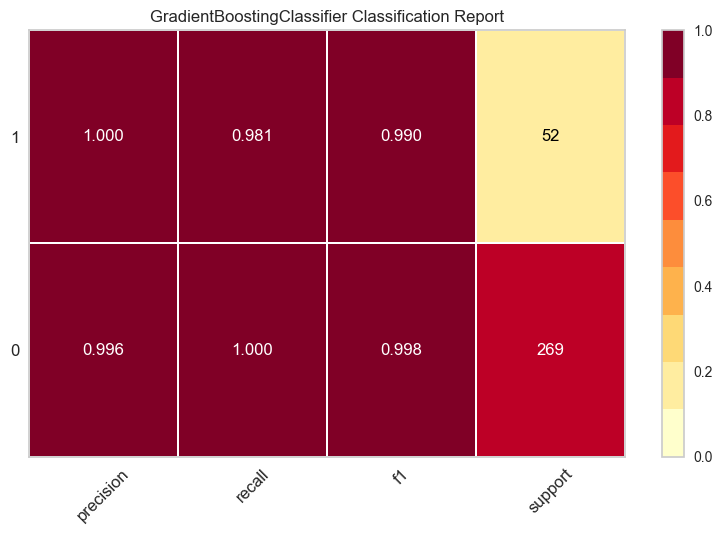

In [69]:
# plot class report
plot_model(best, plot = 'class_report')

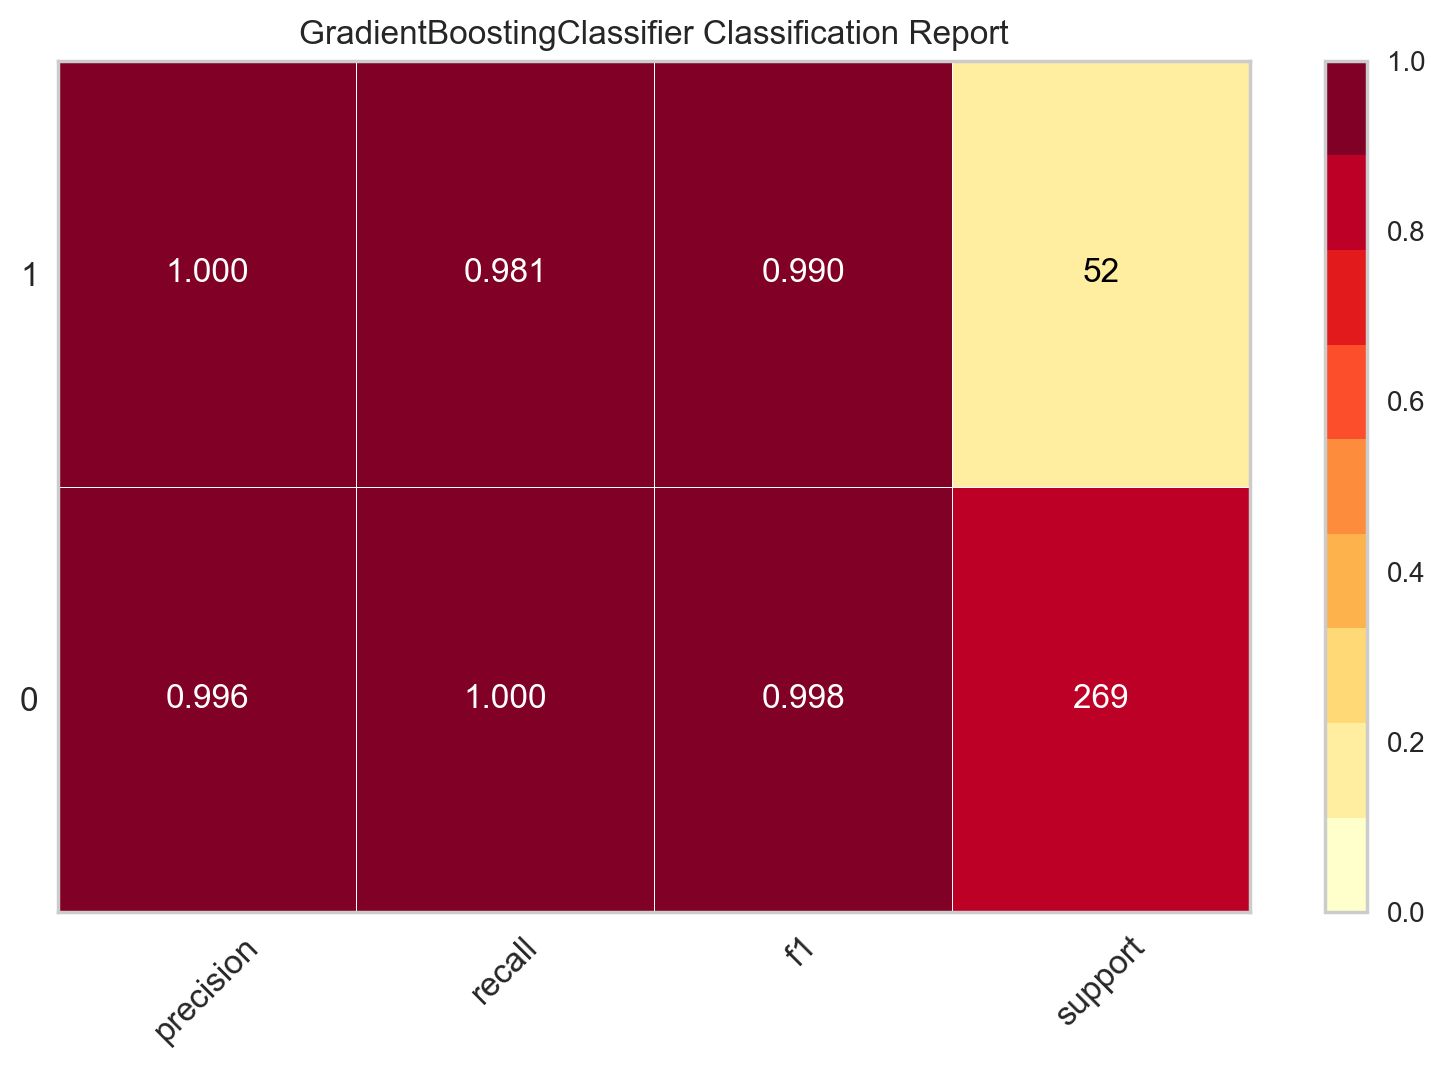

In [70]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [71]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [72]:
# help(plot_model)

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [73]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,1.0000,0.9167,1.0000,0.9565,0.9487,0.9499
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9867,1.0000,1.0000,0.9231,0.9600,0.9520,0.9531
3,0.9733,0.9960,1.0000,0.8571,0.9231,0.9071,0.9110
4,0.9867,0.9868,0.9167,1.0000,0.9565,0.9487,0.9499
5,0.9867,1.0000,0.9167,1.0000,0.9565,0.9487,0.9499
6,0.9733,1.0000,0.8333,1.0000,0.9091,0.8936,0.8987
7,0.9733,0.9947,1.0000,0.8571,0.9231,0.9071,0.9110
8,0.9733,0.9975,0.9231,0.9231,0.9231,0.9069,0.9069


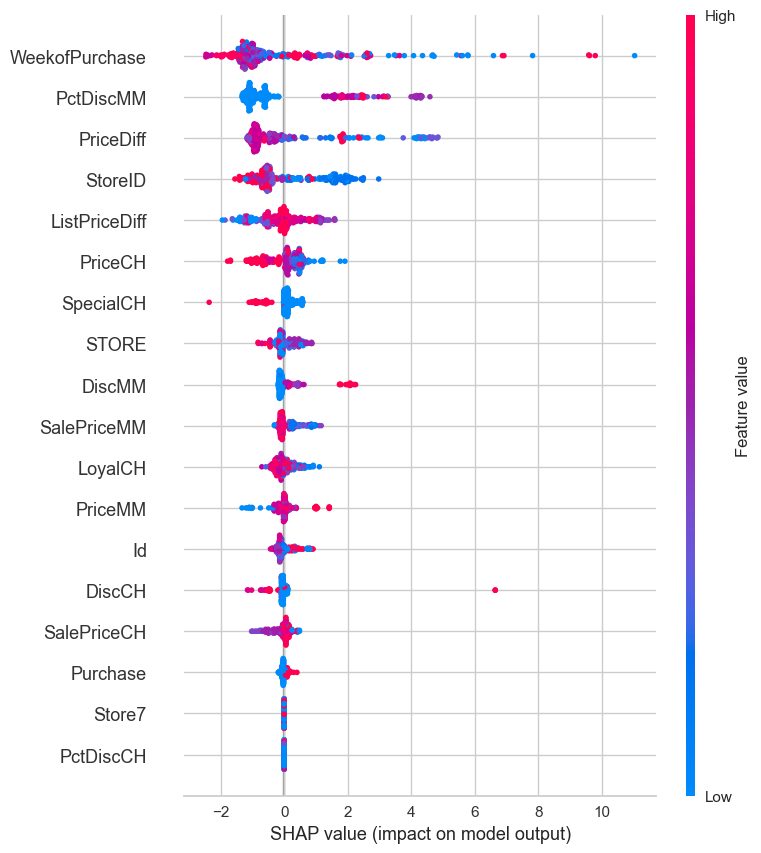

In [74]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [75]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [76]:
# help(interpret_model)

## ✅ Calibrate Model

This function calibrates the probability of a given model using isotonic or logistic regression. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

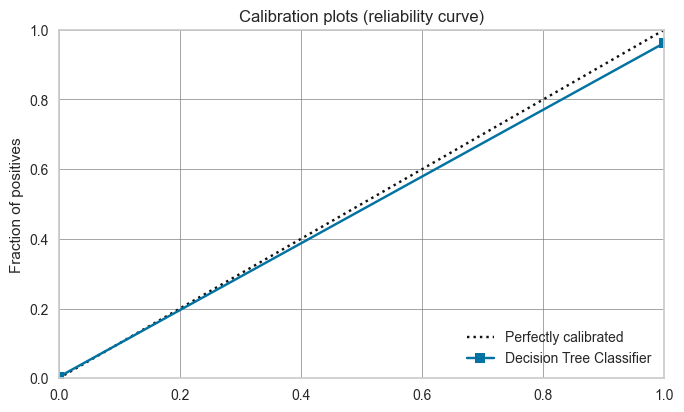

In [77]:
# check calbiration of default dt
plot_model(dt, plot = 'calibration')

In [78]:
# calibrate default dt
calibrated_dt = calibrate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9867,1.0000,0.9167,1.0000,0.9565,0.9487,0.9499
1,0.9733,0.9914,0.8333,1.0000,0.9091,0.8936,0.8987
2,0.9733,0.9888,1.0000,0.8571,0.9231,0.9071,0.9110
3,0.9867,1.0000,0.9167,1.0000,0.9565,0.9487,0.9499
4,0.9733,0.9517,0.8333,1.0000,0.9091,0.8936,0.8987
5,0.9867,0.9563,0.9167,1.0000,0.9565,0.9487,0.9499
6,0.9467,0.9907,0.6667,1.0000,0.8000,0.7706,0.7917
7,0.9467,0.9947,0.8333,0.8333,0.8333,0.8016,0.8016
8,0.9733,0.9547,0.8462,1.0000,0.9167,0.9009,0.9054


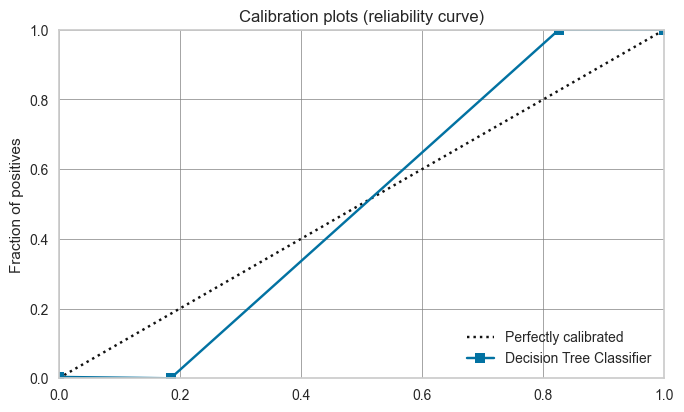

In [79]:
# check calbiration of calibrated dt
plot_model(calibrated_dt, plot = 'calibration')

Some other parameters that you might find very useful in `calibrate_model` are:

- calibrate_fold
- fit_kwargs
- method
- return_train_score
- groups

You can check the docstring of the function for more info.

In [80]:
# help(calibrate_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [81]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric
Index,,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.8772,0.8289,0.3141,0.8194,0.4429,0.3911,0.4529,NaN
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9359,0.9369,0.6929,0.8882,0.7741,0.7378,0.7481,NaN
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.8425,0.8417,0.6442,0.5165,0.5686,0.4745,0.4821,NaN
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9613,0.9202,0.8596,0.9024,0.8782,0.8552,0.8572,NaN
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.8585,0.8352,0.2974,0.8083,0.3515,0.3020,0.3820,NaN
...,...,...,...,...,...,...,...,...,...,...
70,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9599,0.9161,0.8513,0.9000,0.8727,0.8490,0.8510,NaN
71,Voting Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9866,0.9899,0.9756,0.9466,0.9599,0.9519,0.9528,NaN
72,Stacking Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9826,0.9897,0.9423,0.9535,0.9462,0.9358,0.9371,NaN


In [82]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Id', 'WeekofPurchase', 'StoreID',
                                             'PriceCH', 'PriceMM', 'DiscCH',
                                             'DiscMM', 'SpecialCH', 'LoyalCH',
                                             'SalePriceMM', 'SalePriceCH',
                                             'PriceDiff', 'PctDiscMM',
                                             'PctDiscCH', 'ListPriceDiff',
                                             'STORE'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_v...
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_samples_leaf=1,
                                                                          min_samples_split=2,
                                                                          min_weight_fraction_leaf=0.0,
                                                                          n_estimators=100,
                                                                          n_iter_no_change=None,
                                                                          random_state=123,
                                                                          subsample=1.0,
                                                                          tol=0.0001,
                                                                          validation_fraction=0.1,
                                                                          verbose=0,
                                                                          warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None)]],
         verbose=False)

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [83]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [84]:
automl()

VotingClassifier(estimators=[('Quadratic Discriminant Analysis',
                              QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001)),
                             ('Light Gradient Boosting Machine',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_wei...
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=None,
                                                         random_state=123,
                                                         subsample=1.0,
                                                         tol=0.0001,
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## ✅ Check Fairness

There are many approaches to conceptualizing fairness. The check_fairness function follows the approach known as group fairness, which asks: which groups of individuals are at risk for experiencing harm. `check_fairness` provides fairness-related metrics between different groups (also called sub-population).

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9969,1.0000,0.9808,1.0000,0.9903,0.9884,0.9885


,Samples,Accuracy,Recall,Precision,F1,Kappa,MCC,Selection Rate
PriceMM,,,,,,,,
1.69,15,1.0,1.0,1.0,1.0,1.0,1.0,0.066667
1.79,10,1.0,1.0,1.0,1.0,1.0,1.0,0.1
1.99,57,1.0,1.0,1.0,1.0,1.0,1.0,0.333333
2.09,74,1.0,0.0,0.0,0.0,NaN,0.0,0.0
2.13,53,1.0,1.0,1.0,1.0,1.0,1.0,0.150943
2.18,69,0.985507,0.947368,1.0,0.972973,0.963082,0.963739,0.26087
2.23,27,1.0,0.0,0.0,0.0,NaN,0.0,0.0
2.29,16,1.0,1.0,1.0,1.0,1.0,1.0,0.25


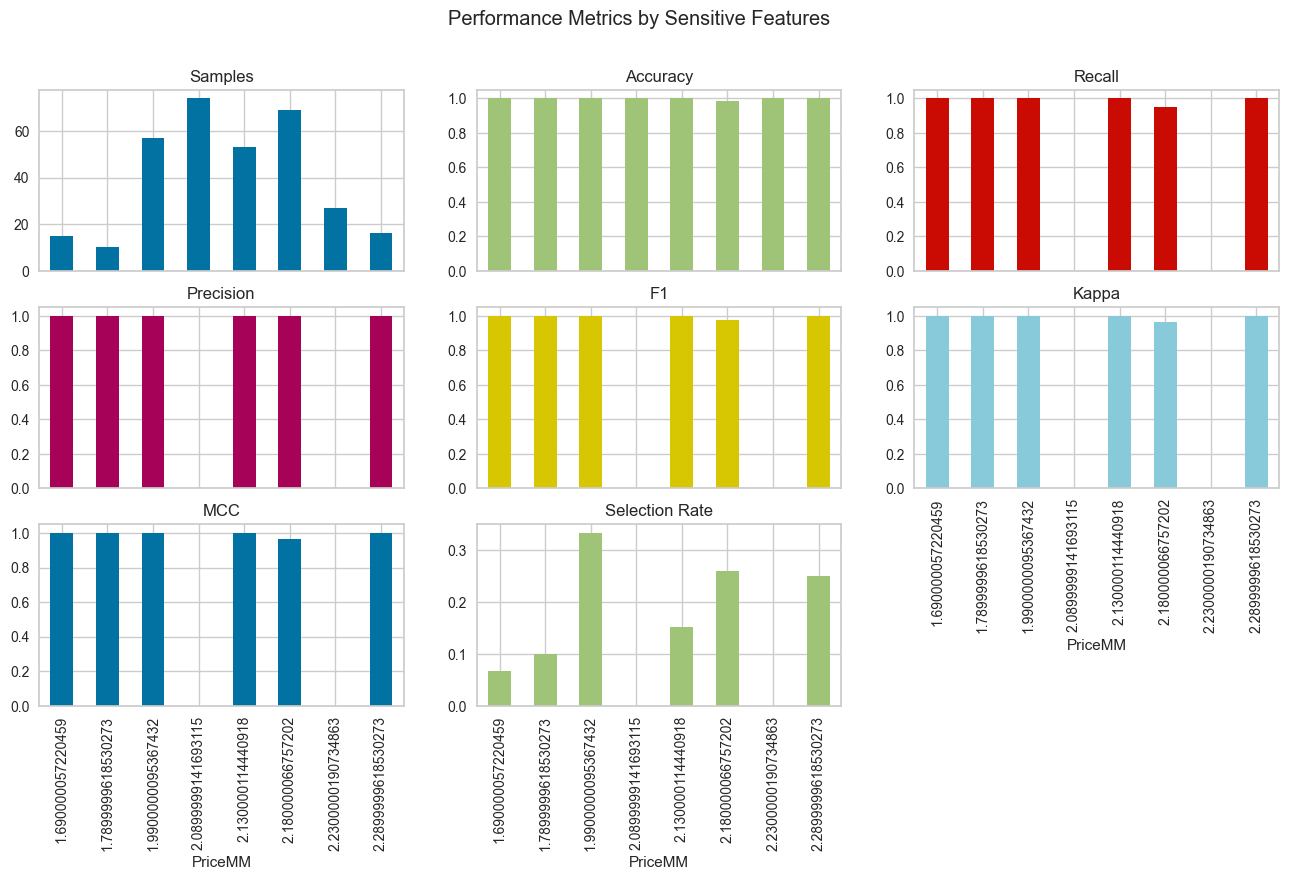

In [85]:
# check fairness
check_fairness(best, sensitive_features = ['PriceMM'])

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [97]:
dashboard(lr)

Note: model_output='probability' is currently not supported for linear classifiers models with shap. So defaulting to model_output='logodds' If you really need probability outputs use shap='kernel' instead.
Note: shap values for shap='linear' get calculated against X_background, but paramater X_background=None, so using X instead...
Generating self.shap_explainer = shap.LinearExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Ca

## ✅Create App
This function creates a basic gradio app for inference.

In [ ]:
# create gradio app
create_app(best)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [99]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [100]:
final_best = finalize_model(best)

In [101]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Id', 'WeekofPurchase', 'StoreID',
                                             'PriceCH', 'PriceMM', 'DiscCH',
                                             'DiscMM', 'SpecialCH', 'LoyalCH',
                                             'SalePriceMM', 'SalePriceCH',
                                             'PriceDiff', 'PctDiscMM',
                                             'PctDiscCH', 'ListPriceDiff',
                                             'STORE'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_v...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [103]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Id', 'WeekofPurchase', 'StoreID',
                                              'PriceCH', 'PriceMM', 'DiscCH',
                                              'DiscMM', 'SpecialCH', 'LoyalCH',
                                              'SalePriceMM', 'SalePriceCH',
                                              'PriceDiff', 'PctDiscMM',
                                              'PctDiscCH', 'ListPriceDiff',
                                              'STORE'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_v...
                                             criterion='friedman_mse', init=None,
                                      

In [104]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/rx/lm_kfng95w9_1rxj88cthphm0000gq/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Id', 'WeekofPurchase', 'StoreID',
                                             'PriceCH', 'PriceMM', 'DiscCH',
                                             'DiscMM', 'SpecialCH', 'LoyalCH',
                                             'SalePriceMM', 'SalePriceCH',
                                             'PriceDiff', 'PctDiscMM',
                                             'PctDiscCH', 'ListPriceDiff',
                                             'STORE'],
                                    transfo...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [105]:
# save experiment
save_experiment('my_experiment')

In [106]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,SpecialMM
2,Target type,Binary
3,Original data shape,"(1070, 19)"
4,Transformed data shape,"(1070, 19)"
5,Transformed train set shape,"(749, 19)"
6,Transformed test set shape,"(321, 19)"
7,Numeric features,16
8,Categorical features,2
9,Preprocess,True
